### Problem Discription

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, secularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

### Data Description:

**The Street View House Numbers (SVHN):** 
Dataset SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

**Link to the dataset:** https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

### Objective:
The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np

import h5py

import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.utils.np_utils import to_categorical

%matplotlib inline

Using TensorFlow backend.
C:\Users\nagarc1\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nagarc1\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nagarc1\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

### Data fetching and understand the train/val/test splits 

In [2]:
# Reading the data file

h5 = "SVHN_single_grey1.h5"

data = h5py.File(h5,'r')

In [3]:
# Lists the contents of the data file

list(data.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

> X_train and y_train datasets are used to train the model                                                                     
> X_val and y_val datasets are used the validate the model after hyperparameter tuning                                         
> X_test and y_test dataset are used to evaluate the model 

In [4]:
# Extracting the Train, Test and Validation datasets

X_test = data['X_test']
X_train = data['X_train']
X_val = data['X_val']
y_test = data['y_test']
y_train = data['y_train']
y_val = data['y_val']

In [5]:
# Converting Train, Test and Validation datasets into an array

X_test = np.array(X_test)
X_train = np.array(X_train)
X_val = np.array(X_val)
y_test = np.array(y_test)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [6]:
# Checking the shape of each of the dataset

print(X_test.shape) 
print(y_test.shape)

print(X_train.shape) 
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

(18000, 32, 32)
(18000,)
(42000, 32, 32)
(42000,)
(60000, 32, 32)
(60000,)


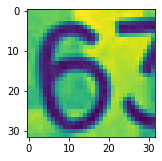

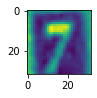

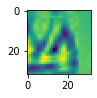

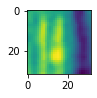

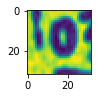

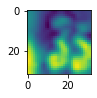

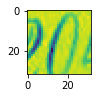

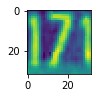

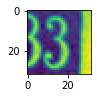

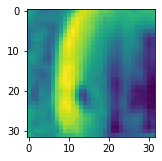

In [7]:
# Checking the digit as index position 21 of the train 

plt.figure(figsize=(10,8))

plt.subplot(3,3,1)
plt.imshow(X_train[1])
plt.show()

plt.subplot(3,3,2)
plt.imshow(X_train[2])
plt.show()

plt.subplot(3,3,3)
plt.imshow(X_train[3])
plt.show()

plt.subplot(3,3,4)
plt.imshow(X_train[4])
plt.show()

plt.subplot(3,3,5)
plt.imshow(X_train[5])
plt.show()

plt.subplot(3,3,6)
plt.imshow(X_train[6])
plt.show()

plt.subplot(3,3,7)
plt.imshow(X_train[7])
plt.show()

plt.subplot(3,3,8)
plt.imshow(X_train[8])
plt.show()

plt.subplot(3,3,9)
plt.imshow(X_train[9])
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
plt.imshow(X_train[10])
plt.show()

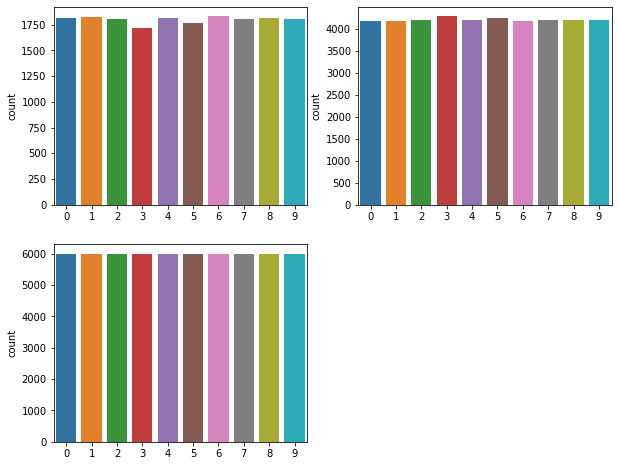

In [8]:
# Classifying the data points as per output class

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(np.array(data['y_test']))
plt.subplot(2,2,2)
sns.countplot(np.array(data['y_train']))
plt.subplot(2,2,3)
sns.countplot(np.array(data['y_val']))

plt.show()

In [9]:
# Flattening the images to 1D 1024 pixels

X_train = X_train.reshape(42000, 1024)
X_test = X_test.reshape(18000, 1024)
X_val = X_val.reshape(60000, 1024)

In [10]:
# Normalizing the data to help with the training

X_train /= 255
X_test /= 255
X_val /= 255

In [11]:
# one-hot encoding using keras  

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [12]:
# Checking the shape of the datasets to reflect 1024 image pixel

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)
(42000, 10)
(18000, 10)
(60000, 10)


### Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) along with backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

### Basic NN Model

In [13]:
# Importing the necessary libraries

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten

In [39]:
#Creating a function for sequential model one input layer, 3 hidden layer and one output layer

def nn_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (1024, )))
    model.add(Activation('relu'))
    model.add(Dense(40))
    model.add(Activation('relu'))
    model.add(Dense(40))
    model.add(Activation('relu'))
    model.add(Dense(40))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    
    return model 

In [40]:
# Fitting the X_train and y_train to the model and using validation dataset to validate the model

model = nn_model()
history = model.fit(X_train, y_train, epochs=20, verbose = 1, validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 40)                41000     
_________________________________________________________________
activation_28 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 40)                1640      
_________________________________________________________________
activation_29 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 40)                1640      
_________________________________________________________________
activation_30 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 40)                1640      
__________

In [41]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 0s 22us/step


In [42]:
print('Test accuracy: ', results[1])

Test accuracy:  0.32372222222222224


> With he bsaic neural network model the result is **32% accuracy**. let's try initialize weigths to the model and check the results

### Weight Initialization

**What is he_normal:** It draws samples from a truncated normal distribution centered on 0 with **stddev = sqrt(2 / fan_in)** where **fan_in** is the number of inputs units in the weight tensor

In [43]:
# Initializing weights to the model with 'he_normal'. Model includes one input layer, 3 hidden layer and one output layer

def mlp_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(40, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(40, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(40, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.summary()
    
    return model

In [44]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 20, verbose = 1, validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 40)                41000     
_________________________________________________________________
activation_33 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 40)                1640      
_________________________________________________________________
activation_34 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 40)                1640      
_________________________________________________________________
activation_35 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 40)                1640      
__________

In [45]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 0s 21us/step


In [46]:
print('Test accuracy: ', results[1])

Test accuracy:  0.09405555555555556


> The model with weight initializers had drastically reduced to 9.4% which is very low. Now we train the model with batch normalization technique that standardizes the inputs to a layer for each mini-batch

### Implement batch normalization for training the neural network

In [47]:
# Importing Batch Normalization from keras.layers.  

from keras.layers import BatchNormalization

In [48]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (1024, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(40))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(40))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(40))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.summary()
    
    return model

In [49]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 20, verbose = 1, validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 40)                41000     
_________________________________________________________________
batch_normalization_14 (Batc (None, 40)                160       
_________________________________________________________________
activation_38 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 40)                1640      
_________________________________________________________________
batch_normalization_15 (Batc (None, 40)                160       
_________________________________________________________________
activation_39 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 40)                1640      
__________

In [50]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 0s 24us/step


In [51]:
print('Test accuracy: ', results[1])

Test accuracy:  0.40155555555555555


> Model yeilds better results with **40% accuracy**

### Dropout

Since the results all the earlier model is not as expected, let's try Dropout method. 

**Dropout:** It is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of the hidden units to 0 at each update of the training phase

In [52]:
# Importing Dropout libray from keras.layers

from keras.layers import Dropout

def mlp_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(40, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(40, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(40, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.summary()
    
    return model

In [53]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1, validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 40)                41000     
_________________________________________________________________
batch_normalization_18 (Batc (None, 40)                160       
_________________________________________________________________
activation_43 (Activation)   (None, 40)                0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 40)                1640      
_________________________________________________________________
batch_normalization_19 (Batc (None, 40)                160       
_________________________________________________________________
activation_44 (Activation)   (None, 40)                0         
__________

In [54]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 28us/step


In [55]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6363333333333333


> Better results with **63.63%** accuracy. Now, since the model looks good we can try iterate with various combination of layers and neurons

### Iterate #1

Neural Network with one input layer which have 1024(image pixel size) and one hidden layer with 250 neurons, hence the weight matrix 250 1024 and another hidder layer with 125 neurons. We have 10 neurans since we have 10 outputs.   

In [56]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(250, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(125, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.summary()
    
    return model

In [57]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1, validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 250)               256250    
_________________________________________________________________
batch_normalization_22 (Batc (None, 250)               1000      
_________________________________________________________________
activation_48 (Activation)   (None, 250)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 125)               31375     
_________________________________________________________________
batch_normalization_23 (Batc (None, 125)               500       
_________________________________________________________________
activation_49 (Activation)   (None, 125)               0         
__________

In [58]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 36us/step


In [59]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6600555555555555


> Iterate #1 has increases the accuracy to **66%** 

### Iterate #3

Adding two inputs layers with first layer having 250 neurons with weight matrix 250 1024, second one with again 250 neurons with weight matrix 250 250, third layer with 125 neurons and output layer with 10 neurons

In [60]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(250, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(250, input_shape = (250, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(125, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.summary()
    
    return model

In [61]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1, validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 250)               256250    
_________________________________________________________________
batch_normalization_24 (Batc (None, 250)               1000      
_________________________________________________________________
activation_51 (Activation)   (None, 250)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 250)               62750     
_________________________________________________________________
batch_normalization_25 (Batc (None, 250)               1000      
_________________________________________________________________
activation_52 (Activation)   (None, 250)               0         
__________

In [62]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 48us/step


In [63]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7563888888888889


> This model yeilds the a very good score compared any other earlier models with **75.63% accuracy**

### Iterate #3: Tried with different learning rate 0.004

In [90]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(250, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(250, input_shape = (250, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(125, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.004)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.summary()
    
    return model

In [91]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1, validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 250)               256250    
_________________________________________________________________
batch_normalization_48 (Batc (None, 250)               1000      
_________________________________________________________________
activation_83 (Activation)   (None, 250)               0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 250)               62750     
_________________________________________________________________
batch_normalization_49 (Batc (None, 250)               1000      
_________________________________________________________________
activation_84 (Activation)   (None, 250)               0         
__________

In [92]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 68us/step


In [93]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7767222222222222


> **Conclude:** The final iterative model with learning rate of 0.004 has the highest accuracy of **77.67%**

> **Hyperparameters used:** Dropout, Weight Initialization, Activation Function, Learning Rate, Number of Epochs